<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 7 Day 2</div>
<div style="text-align: right">Dino Konstantopoulos, 17 October 2019</div>

- Second reading: jump to Exercise 4 of Section 8.

# Introduction to *Linear Algebra* and *Graph Theory* with NumPy and SciPy

We're done with the **statistics** part of our class (does this mean no more stats? *Noooo*, this means from  now on you need to know *all* about stats and be ready to apply that knowledgeat any time), and now we're starting off on the **linear algebra** part.

The great thing with computers is: you don't need to be that good at math. All you need to be good at is translating logic to predicates and then using libraries like `PyMC3` for probabilistic programs, and for linear algebra, `SciPy`.

`NumPy` is for performance. `SciPy` contains all classic (non-probabilistic, which implies machine-learning) scientific algorithms.

There's so much to look at in linear algebra. I picked 10 important topics, important stuff you need to make sure you understand, and then we apply it to do **ecology** with **graphs**.

</br >
<center>
<img src="images/ecology.jpg" width=600 />
</center>

<div style="text-align: right; color: gray">1</div>
## 1. What is Linear Algebra? It's about the mountain!
Linear algebra is the study of *linear transformations* on **vectors**, which represent points in a finite dimensional space. The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.  The familiar definition,

$$ y_i = \sum_j A_{ij} x_j $$

which says:

$$ y_1 = A_{1,1} x_1 + \cdots + A_{1,n} x_n \\
   y_2 = A_{2,1} x_1 + \cdots + A_{2,n} x_n \\
   \vdots \\
   y_n = A_{n,1} x_1 + \cdots + A_{n,n} x_n $$

can also be viewed as

$$ y = \Bigg[ A_{:,0} \Bigg| A_{:,1} \Bigg| \dotsm \Bigg] \begin{bmatrix} x_0 \\ x_1 \\ \vdots \end{bmatrix}
= \Bigg[ A_{:,0} \Bigg] x_0 + \Bigg[ A_{:,1} \Bigg] x_1 + \dotsb . $$

The notation $A_{i,j}$ corresponds to the Python syntax `A[i,j]` and the colon `:` means the entire range (row or column).  So $A_{:,j}$ is the $j$th column, and $A_{i,:}$ is the $i$th row.  The corresponding Python syntax is `A[:,j]` and `A[i,:]`.

Here's an elementary example:
```python
v = 3*x - 2*y
w = 5*x + y
```
Given $v = 3$ and $w = 1$, what are $x$ and $y$?

You have to solve 2 linear equations of 2 unknowns. We already did this with MOM. Solve the first equation for x (as a function of y). Then plug x into the second equation. Get the solution for y. Then plug in the value of y in the first equation. Get x. Simple!

But there is a more mechanistic way of doing this, which works for 2 equations of 2 unknowns or 100 equations of 100 unknowns. And computers can do it reall well, too!

A Matrix is a **spreadsheet**, and Matrix multiplication is **how you move in state space**. Remember, finding the solution to a problem is usually locating a global maximum (or minimum) in your state space that maximizes (or minimizes) a **cost function** (Metropolis' cost function is the probability of observing the data with the model at hand). 

The cost function is your ***mountain***, and you're climbing the mountain to try to get to its **peak**. At the peak, the derivative is zero, and the function is at its maximum. 

How do you **move** from one point on the mountainside to another point on the mountainside? You get your location (it's a **vector**), you multiply by a **matrix** (which is a vector transformation), and you get to another location (a different vector). Each step is a matrix multiplication. Since each step can be different, each matrix can be different.

In Metropolis, we moved along a **single axis**, so that was simple: add a delta. But if you move in 2D, 3D, or nD space, you move by taking your current coordinates in that space, mutliplying by a matrix, and getting to new coordinates.

</br >
<center>
<img src="images/elCapitan.gif" width=400 />
</center>

So, today we're going to learn how to move on mountains with a python notebook :-) 

Ready?

<div style="text-align: right; color: gray">2</div>
## 2. Multiplication and basic operations

Basic linear algebra is all about learning how spreadsheets *multiply*:

</br >
<center>
<img src="ipynb.images/matrix-multiply-constant.gif" width=400 />
Multiplying a matrix by a constant
</center>

</br >
<center>
<img src="ipynb.images/matrix-multiply-a.svg" width=400 />
Multiplying a matrix with another, **first row, first column**
</center>

</br >
<center>
<img src="ipynb.images/matrix-multiply-b.svg" width=400 />
Multiplying a matrix with another, **first row, second column**
</center>

</br >
<center>
<img src="ipynb.images/matrix-multiply-c.svg" width=400 />
Multiplying a matrix with another, **final result**
</center>

</br >
<center>
<img src="ipynb.images/matrix-identity.gif" width=200 />
A Matrix that when multiplied by another, does not change it
</center>

</br >
<center>
<img src="ipynb.images/matrix-multiply-order.gif" width=400 />
Order matters
</center>

`numpy.zeros_like()` returns an array of zeros with the same shape and type as a given array.

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
pyplot.style.use('ggplot')

def matmult1(A, x):
    """Entries of y are dot products of rows of A with x"""
    y = np.zeros_like(A[:,0])
    for i in range(len(A)):
        row = A[i,:]
        for j in range(len(row)):
            y[i] += row[j] * x[j]
    return y

def matmult2(A, x):
    """Same idea, but more compactly"""
    y = np.zeros_like(A[:,0])
    for i,row in enumerate(A):
        y[i] = row.dot(x)
    return y

def matmult3(A, x):
    """y is a linear expansion of the columns of A"""
    y = np.zeros_like(A[:,0])
    for j,col in enumerate(A.T):
        y += col * x[j]
    return y

# Define matrix and vector
x = np.array([0,1,2])
A = np.array([[2,1,2],[3,2,0],[1,0,1]])

print("A =")
print(A)
print("x =")
print(x)
print("Ax =")
print(matmult1(A, x))
print(matmult2(A, x))
print(matmult3(A, x))

A =
[[2 1 2]
 [3 2 0]
 [1 0 1]]
x =
[0 1 2]
Ax =
[5 2 2]
[5 2 2]
[5 2 2]


If you use an earlier version of Python (than 3.5), the `@` operator isn't defined yet. To perform matrix multiplication, you need to use `numpy.dot(A,B)` in place of `A@B`. That will require you to start with `import numpy` before doing any of this. But hey, I think `@` rocks!

In [5]:
import numpy as np

# matrix-vector product
y = A@x
print("A =")
print(A)
print("x =")
print(x)
print("Ax =")
print(np.dot(A,x))
print(y)

A =
[[2 1 2]
 [3 2 0]
 [1 0 1]]
x =
[0 1 2]
Ax =
[5 2 2]
[5 2 2]


In [6]:
# element-wise operations
x[0] = 1
A[0,1] = 2

# extracing rows and columns
print("A[1,:] = ")
print(A[1,:])
print("A[:,1] = ")
print(A[:,1])

# copy matrix
B = A.copy()
print("B = ")
print(B)

# transpose
print("B.T = ")
print(B.T)

A[1,:] = 
[3 2 0]
A[:,1] = 
[2 2 0]
B = 
[[2 2 2]
 [3 2 0]
 [1 0 1]]
B.T = 
[[2 3 1]
 [2 2 0]
 [2 0 1]]


<div style="text-align: right; color: gray">3</div>

## 3. Climbing Mountains: A little exercise

In [7]:
import numpy as np

# Define vector: position of mountain climber
x = np.array([0,1,2])
print("initial: ", x)
print('---')

# Define matrix: jump-twist-and-half-with-three-spins-and-one-amazing-handhold  
Twist = np.array([[2,1,2],[3,2,0],[1,0,1]])
print("Twist matrix: ")
print(Twist)
print('---')

# Define matrix: rappel with rope over a dangerous cliff
Rappel = np.array([[5,3,1],[4,0,1],[3,2,-1]])
print("Rappel matrix: ")
print(Rappel)
print('---')

# Position of mountain climber after jump-twist
y = Twist @ x
print("After jump-twist: ", y)
print('---')

# position of mountain climber after rappel following jump-twist
z = Rappel @ y
print("After rappel: ", z)
print('---')

# Combination jump-twist and rappel
Combo = Rappel @ Twist
print("Combo matrix: ")
print(Combo)
print('---')

# position of climber from initial position after combination jump-twist and rappel
z2 = Combo @ x
print("After combo: ", z2)
print(z == z2)
print('---')

# Inverse of Combo
Cinv = np.linalg.inv(Combo)
print("Inverse of Combo matrix: ")
print(Cinv)
print('---')

# Initial position of climber:
x2 = Cinv @ z2
print("Initial position of climber: ", x2)
print(x2 == x)
print('---')

initial:  [0 1 2]
---
Twist matrix: 
[[2 1 2]
 [3 2 0]
 [1 0 1]]
---
Rappel matrix: 
[[ 5  3  1]
 [ 4  0  1]
 [ 3  2 -1]]
---
After jump-twist:  [5 2 2]
---
After rappel:  [33 22 17]
---
Combo matrix: 
[[20 11 11]
 [ 9  4  9]
 [11  7  5]]
---
After combo:  [33 22 17]
[ True  True  True]
---
Inverse of Combo matrix: 
[[ 0.75438596 -0.38596491 -0.96491228]
 [-0.94736842  0.36842105  1.42105263]
 [-0.33333333  0.33333333  0.33333333]]
---
Initial position of climber:  [0. 1. 2.]
[ True False False]
---


<div style="text-align: right; color: gray">4</div>
## 4. A bit of Math, and Special arrays


### Inner products, orthogonality, and Matrix norms

The **inner product**
$$ x^T y = \sum_i x_i y_i $$
of vectors (or columns of a matrix) tell us about the magnitude and about the angle formed by the two vectors. Think about it this way: the magnitude, or **norm**, of a vector tells the mountain climber how far he or she is from his starting point (origin). The **angle** between two vectors tells someone at the origin what the viewing angle is between one climber (one vector), and the other climber (the other vector).

The **norm** of a vector is induced by the inner product,
$$ \lVert x \rVert = \sqrt{x^T x} $$

The **angle** $\theta$ between the two vectors is defined by
$$ \cos \theta = \frac{x^T y}{\lVert x \rVert \, \lVert y \rVert} . $$

Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties

$$ \begin{split}
(x + y)^T z &= x^T z + y^T z \\
x^T (y + z) &= x^T y + x^T z \\
(\alpha x)^T (\beta y) &= \alpha \beta x^T y \\
\end{split}  $$

The pairwise inner products between two sets of vectors can be expressed by collecting the sets as columns in matrices and writing $A = X^T Y$ where $A_{i,j} = x_i^T y_j$.
It follows from this definition that
$$ (X^T Y)^T = Y^T X $$


If $x^T y = 0$ then we say $x$ and $y$ are **orthogonal** (or "$x$ is orthogonal to $y$"). The cosine of the angle between the two vectors is 0, which means the angle formed by the two vectors is a 90 degree angle. If you see one climber due north, the other climber is due east (or west)!

A vector is said to be **normalized** if $\lVert x \rVert = 1$. It's as if the mountain climber needs to be exactly, say 1km from the origin, in whatever direction.

If $x$ is orthogonal to $y$ and $\lVert x \rVert = \lVert y \rVert = 1$ then we say $x$ and $y$ are **orthonormal**. That's when two climbers are at distinct cardinal points (east, west, north, south), at exactly 1 km. from the origin.

In 2D, there are 4 cardinal points, forming two directional axes. In $n$D, there are $2n$ cardinal points forming $n$ directional axes.

A square matrix with orthonormal column vectors is said to be an **orthogonal matrix**. If you have $n$ mountain climbers, and your state space is $n$-dimensional, then an orthonormal square matrix is like observing your mountain climbers at each of the distinct $n$ axes of your state space. Together, they form an $n$-dimensional *unit* **hypercube**.

We typically use $Q$ or $U$ and $V$ for matrices that are known/constructed to be orthogonal.
Orthogonal matrices are always full rank -- the columns are **linearly independent**. That means no one column can be written as a linear combination of any of the other ones. No mountain climber's position is a linear combination of other mountain climber's positions. Which makes these columns a **base** of the underlying vector space: Any vector of that vector space can be written as a linear combination of these column vectors. Any $(n+1)$th mountain climber's position can be written as a linear combination of the position of the other mountain climbers.

The inverse of an orthogonal matrix is its transpose:
$$ Q^T Q = Q Q^T = I . $$

That's nice because transposing a matrix is super easy. Finding the inverse of a non-orthogonal matrix is **hard**. The runtime complexity is bounded by $O(n^3)$. Orthogonal matrices are a powerful building block for robust numerical algorithms.

`np.linalg` contains basic linear algebra operations, like norms and [Frobenius norm] (square root of the sum of the absolute squares of its elements). See [MathWorld](http://mathworld.wolfram.com/FrobeniusNorm.html).

Vector norms are built into the linear space (and defined in term of the inner product).  Matrix norms are *induced* by vector norms, according to

$$ \lVert A \rVert = \max_{x \ne 0} \frac{\lVert A x \rVert}{\lVert x \rVert} . $$

* Try to see how **far away** a mountain climber can move, from any starting position - That's the matrix norm and it's a function of the mountain, not of the climber!
* This equation makes sense for non-square matrices -- the vector norms of the input and output spaces may differ.
* Due to linearity, all that matters is direction of $x$, so it could equivalently be written

$$ \lVert A \rVert = \max_{\lVert x \rVert = 1} \lVert A x \rVert . $$

Norms are the metrics that learning machines use to minimize learning constraints.

Whew! That was a lot of math, right? But it was *fun*, when you think of it as **mountain climbers** :-)

### Special matrices
Here we learn how to use `numpy` to write some very useful arrays you are going to need *all the time*!

In [8]:
# all ones or zeros
y = np.zeros(4)
print(y)
F = np.ones((4,4))
print(F)

# normally distributed random elements
#  array of shape (d0, d1, ..., d4), filled with random floats sampled from a univariate “normal” (Gaussian) distribution 
# of mean 0 and variance 1. A single float randomly sampled from the distribution is returned if no argument is provided.
r = np.random.randn(2,2,2)
print(r)

# identity matrix
I = np.eye(3)
print(I)

# banded matrix
L = np.diag([1,1],k=-1)
print(L)

[0. 0. 0. 0.]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[[ 0.47138022  0.09520377]
  [-0.35911994  0.47348061]]

 [[-0.12844793 -0.5012544 ]
  [-0.12162771  0.20808861]]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0 0 0]
 [1 0 0]
 [0 1 0]]


**Exercise**: Create a 4 x 4 matrix with $a_{ii} = 2$, $a_{i,j!=i} = 1$

<div style="display:none;">
np.ones((4,4)) + np.eye(4)   
</div>

**Exercise**: Create a 10 x 10 matrix with $a_{ii} = 2$, $a_{i,i+1} = a_{i,i−1=1} = 1$, and 0 otherwise.

<div style="display:none;">
np.diag(np.ones(9),k=-1) + np.diag(np.ones(9),k=1)  + 2 * np.eye(10)  
</div>

<div style="text-align: right; color: gray">5</div>
## 5. Inverting matrices

Matrix multiplication is *not* **commutative**, as we saw earlier.

In [9]:
B = np.array([[2, 3],[0, 4]])
print(B)
print(B @ B.T)
print(B.T @ B)
print(B.T @ B == B @ B.T)

[[2 3]
 [0 4]]
[[13 12]
 [12 16]]
[[ 4  6]
 [ 6 25]]
[[False False]
 [False False]]


However, matrix multiplication is **associative**:

$$ A. (B.C) == (A.B) .C$$

When we write $x = A^{-1} y$, we mean that $x$ is the unique vector such that $A x = y$.

We use `numpy.linalg.inv()` to evaluate the inverse of a matrix, as we saw above.

Matrix multiplication is associative! And we can follow the actions of state machines on vector states with matrix multiplication, which is just a math operation that defines how we mutliply spreadsheets together!

We can use [numpy.linalg.solve()](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.solve.html) to solve a linear system of equations.

For example, what is a mountain climber's position $x$ such that $C$ $x$ = $z$ where $y$ is the column vector (33, 22, 17)?

$$ C x = z$$

In [10]:
C = np.array([[20, 11, 11],[9, 4, 9], [11, 7, 5]])
z = np.array([33, 22, 17])
solution = np.linalg.solve(C, z)
solution

array([0., 1., 2.])

Wow, that's the initial position of our mountain climber! So *that's* what math is.. just mountain-climbing! And think that I was scared of math once upon a time... 

</br >
<center>
<img src="ipynb.images/scared.jpg" width=400 />
(*bad* professors..)
</center>


In [11]:
#verify
C @ solution

array([33., 22., 17.])

In [12]:
# additionally
print(Cinv @ C)
print('---')
print(C @ Cinv)
print('---')
print(np.linalg.solve(C, C))
print('---')

[[ 1.00000000e+00  2.22044605e-16  6.66133815e-16]
 [-3.55271368e-15  1.00000000e+00 -8.88178420e-16]
 [-1.11022302e-15 -2.22044605e-16  1.00000000e+00]]
---
[[ 1.00000000e+00 -4.44089210e-16 -6.66133815e-16]
 [-1.66533454e-16  1.00000000e+00 -2.22044605e-16]
 [-1.27675648e-15 -4.44089210e-16  1.00000000e+00]]
---
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.34395419e-15  1.00000000e+00 -0.00000000e+00]
 [-3.70074342e-16 -1.11022302e-17  1.00000000e+00]]
---


### Exercise:

Solve the elementary linear algebra question at the introduction of this notebook

In [13]:
C = np.array([[3, -2],[5, 1]])
z = np.array([3, 1])
solution = np.linalg.solve(C, z)
solution

array([ 0.38461538, -0.92307692])

<div style="display:none;">
import numpy as np

C = np.array([[3, 2],[5, 1]])
z = np.array([3, 1])
solution = np.linalg.solve(C, z)
solution
</div>

<div style="text-align: right; color: gray">6</div>
## 6. Eigenvalues and eigenvectors

Ok, this is the ***most important thing to know*** about linear algebra. Please pay attention. No facebook for 10 minutes, ok?

### What are eigenvectors?

* A Matrix is a mathematical object that acts on a (column) vector, resulting in a new vector, i.e. A**x**=**b**. It represents a **move**, in any direction, for a mountain-climber.
* A vetor is like an arror pointing to a location on the mountain, right? Well, an **eigenvector** $v$ is a **position on the mountain** $x$ such that ***for a class of mountain moves described by a matrix $C$***, the resulting position (or vector) $y$ following that mountain move is **parallel** to the original position $x$ (some multiple of $x$). 

It's as if the **new position** of the mountain climber is **in the same direction** as defined by his previous position and the origin (where he started his climb):

$$ {C}\underline{x}=\lambda \underline{x} $$

$\lambda$ is its **eigenvalue**. It's **how much** the mountain climber moved from the previous position.


### What are eigenvalues?

Given $A \in \mathbb{R}^{n\times n}$, $\lambda$ is the **eigenvalue** of $C$ if there is a non-zero vector $x$, the corresponding **eigenvector**, such that the following is true:

$$Cx = \lambda x, \;\; \text{for} \; x \neq 0$$

Is there a move that can take a mountain-climber to *some factor* times his original position? If so, the old position is an eigenvector, and the moving factor is its eigenvalue.

Formally, given a square matrix $C \in \mathbb{R}^{n\times n}$, we say that $\lambda \in \mathbb{C}$ is an **eigenvalue** of $C$ and $x \in \mathbb{C}^n$ is the corresponding **eigenvector**.

Intuitively, this definition means that multiplying $C$ by the vector $x$ results in a new vector that points in the same direction as $x$, but is scaled by a factor $\lambda$.

Also note that for any **eigenvector** $x \in \mathbb{C}^n$ **of $C$**, and scalar $k \in \mathbb{C}, C(kx) = kCx = k\lambda x = \lambda(kx)$, so $kx$ is also an **eigenvector of $C$**. For this reason when we talk about **“the” eigenvector** associated with $\lambda$, we usually assume that the **eigenvector** is normalized to have length $1$ (this still creates some ambiguity, since $x$ and $−x$ will both be **eigenvectors**, but we will have to live with this).

For any $\lambda$ an eigenvalue of $C$, there is a vector space, the **eigenspace**, that corresponds to $\lambda$:

$$\{ x : C x = \lambda x \}$$

Any non-zero vector in this space is an eigenvector. One convenient requirement is that the eigenvector has norm $1$.


### What are eigenvectors and eigenvalues for mountain climbers?

Linear algebra is multiplying vectors (mountain climbers positions) with matrices (technical mountain climber moves), to get to a new mountain position. So what corresponds to an eigenvector, then?

***For a specific technical move described by a matrix***, there is a mountain climber position such that her next position will be parallel to her previous position. In other words, an observer at the origin looking at his mountain climber girlfriend very far away through binoculars ***will not have to adjust his binoculars to continue to observe her***: She just either moved a bit closer or a bit further away, but remained in the same direction relative to the observer. If we call the factor by which she moved closer or further away $\lambda$, her previous position $x$, and her next position $y$, and the technical mountain move $T$, then:

$$ y = T \; x = \lambda x$$

</br >
<center>
<img src="ipynb.images/binoculars.jpg" width=400 />
</center>


There is a theorem in linear algebra that says that (almost) all technical mountain moves have such mountain positions $x$. In fact, an $n$ x $n$ matrix $T$ has $n$ such vectors.

What's the big deal? We'll see that soon..

<div style="text-align: right; color: gray">7</div>
## 7. Eigenvalues and eigenvectors in SciPy

Turns out `scipy` also has a good amount of linear algebra functionality. Which library to pick, `numpy` or `scipy`? *Your* choice.

In fact, consider this is our *official* introduction to `scipy`. We'll continue next lectures, but this is good for now.

</br >
<center>
<img src="images/hi.png" width=200 />
</center>

### Exercise

What are the eigenvalues and eigenvectors of our Combo mountain jump?

In [14]:
import scipy as sp
import scipy.linalg as la

C = np.array([[20, 11, 11],[9, 4, 9], [11, 7, 5]]) 

(v, r) = la.eig(C, left = False) # You can read the help, buy the left eigenvectors don't get created without this. 
d = sp.diag(v)  # by default, eig puts the eigenvalues in a 1-D array. We will need a diagonal matrix in a moment.

print(v)
print(d)
print(r)

[31.57174825+0.j  0.57393335+0.j -3.1456816 +0.j]
[[31.57174825+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.57393335+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j -3.1456816 +0.j]]
[[-0.80213043 -0.59657254  0.15749753]
 [-0.40505528  0.73786379 -0.84403635]
 [-0.43876758  0.31568692  0.51263747]]


In [15]:
R = np.random.randn(4,4)
(eigenvalues, eigenvectors) = la.eig(R, left = False)
print(eigenvalues)
print(eigenvectors)

[-0.85890391+0.j         -0.16858629+1.25511281j -0.16858629-1.25511281j
  1.40442933+0.j        ]
[[ 0.62818404+0.j          0.10831969+0.15669484j  0.10831969-0.15669484j
   0.07502002+0.j        ]
 [-0.68991532+0.j          0.8090735 +0.j          0.8090735 -0.j
  -0.070056  +0.j        ]
 [ 0.35485628+0.j         -0.11459541-0.07810362j -0.11459541+0.07810362j
  -0.99409305+0.j        ]
 [-0.05898039+0.j         -0.29466268+0.45061654j -0.29466268-0.45061654j
  -0.03525839+0.j        ]]


In [16]:
np.linalg.inv(R)

array([[-0.81960032,  0.24177005, -0.13394009,  0.03710618],
       [ 0.31330679, -0.6630473 ,  0.17318728, -1.48411136],
       [-0.62111194,  0.30809741,  0.62424467,  0.54142703],
       [ 0.62211929,  0.4668148 ,  0.03235672,  0.19591854]])

If the mountain climber starts at any of the three positions described by the eigenvectors, she will end up facing in the same direction (from the perspective of her observer boyfriend at the origin of the mountain), just slightly closer or further away from him, by a factor of the eigenvalue associated with the eigenvector.

<div style="text-align: right; color: gray">8</div>
## 8. Application of Eigenvectors: Markov Chains

A **Markov chain** is any *memorlyess* process that can be modeled with a *stochastic transition* matrix. It's like a mountain climber that always forgets her previous position, and only cares about the next (which is the right state of mind if you're climbing *El Capitan* in Yellowstone National Park! Did you see the movie *Free Solo*? Scariest movie of my life!)

<br />
<center>
<img src = ipynb.images/moody.png width = 600 />
    Moody's credit rating transitions
</center>
<br />

### Repeated transitions
Conjecture: If the transition matrix $P$ is the same after each step (time homogeneous), then the k-step transition probability is.. the k-th power of the transition matrix, $P^k$.

I don't think I need to convince you of this, we illustrated this with the mountain climber and the Combo matrix!

And so, the k-step transition is characterized by the matrix $A^k$.

### Steady state limit
Now what if, in the long term, after many powers of $k$, we suddenly transition to a condition where the states don't change very much? Well, we acheive what is called a **steady-state** condition: 

$$P^{\;k+1} = P^{\;k} \;\text{, for  very large} \; k$$

Stationary distributions are super-interesting to Wall Street, because they describe the ***future***! Suppose we call that future the state vector $\pi$. Then:

$$\pi = P . \pi$$

Hey, wait a second, does that equation remind you of anything?


### Eigenvectors and the *future*
The eigenvectors $X_1, \cdots X_n$ of $n$ x $n$ matrix $A$, and its associated eigenvalues $λ_i$, are such that:

$$A X_i = λ_i X_i$$

And so the **future**, described as state vector $\pi$, is the ***eigenvector associated with the eigenvalue 1***!

**Google** realized that this corresponds to the steady state condition of a sliver surfer surfing the Web through its hyperlinks. It descibes the probabilistic future state of the sliver surfer. If you rank all of its components from highest probability to lowest probability, it's the Google search page for your search query (corresponding to a silver surfer surfing for Web pages relevant to your query terms)!

Assume the mountain climber climbs the entire mountain using just one type of jump, let's call this the **Twist** matrix jump.

Imagine that we are able to represent any position on the mountain as a **linear combination of eigenvectors** of the **Twist** matrix. That, in fact, is a ***theorem*** that is true if the **Twist** matrix is **non-singular** (has a non-zero **determinant**).

To find the mountain climber's position after $n$ **Twist** jumps, we multiply her position vector by the **Twist** matrix, $n$ times, right? Which corresponds to a single multiplication by the matrix **Twist$^n$**, right? Each application of **Twist** adds a factor of the eigenvalue $λ$ to the coefficient of each eigenvector in the expansion of the state. Recall: The eigenvectors don’t transform much.. They just squish or expand (by a factor of $λ$). So after $n$ transitions, the coefficient of each eigenvector has gained a factor $λ^n$.

If λ > 1, this factor would grow without bound as $n$ increases, leading to matrix elements larger than 1, which would catapult the mountain climber to the moon! So, there must not be any eigenvalue strictly larger than one!

If λ < 1, this factor would suppress the contribution of the corresponding eigenvector as $n$ increases. It’s fine if this happens to some eigenvectors, but if it happens to *all of them*, the probability interpretation of our state vector would also be ruined, because all entries in our vector would be driven to zero, and the mountain climber would **never move**.

So, **there must be at least one eigenvalue greater or equal to one!**

The **dominant eigenvector** (eigenvector corresponding to the eigenvalue = 1) of any Markov chain *is* the **steady-state limit (the *long-term future*) of the Markov chain**!

The dominant eigenvector will become the *only unsuppressed contribution* to the state vector as $n$ gets large.
This eigenvector therefore represents the steady-state towards which every **linear system** tends to.

The dominant eigenvector is the future of Markov chains. That is why we love Markov chains: With a bot of math, wwe can predict their future!

So if we start with a random vector (random mountain climber position), and apply the **Twist** matrix a million times, we will ultimately converge to the dominant eigenvector, since all other eigenvalue-to-the-power-a-million contributions will become suppressed. 

It's the same method used by Google to rank the WWW!


### Exercise 1

Find the eigenvalues and eigenvectors of the square of the following matrix as well as the inverse of the matrix minus the identity matrix. Use `sympy`, a symbolic math manipulation program.
```(python)
pip install sympy
```

$$ {A}=\begin{bmatrix} 1 & 2 & 3 \\ 0 & 1 & -2 \\ 0 & 1 & 4 \end{bmatrix} $$

In [17]:
from sympy import Matrix
A = Matrix([[1, 2, 3], [0, 1, -2], [0, 1, 4]])
A

Matrix([
[1, 2,  3],
[0, 1, -2],
[0, 1,  4]])

In [18]:
# eigenvalues
A.eigenvals()

{3: 1, 2: 1, 1: 1}

<div style="display:none;">
A.eigenvals()    
</div>

In [19]:
# eigenvectors
A.eigenvects()

[(1, 1, [Matrix([
   [1],
   [0],
   [0]])]), (2, 1, [Matrix([
   [-1],
   [-2],
   [ 1]])]), (3, 1, [Matrix([
   [1/2],
   [ -1],
   [  1]])])]

<div style="display:none;">
A.eigenvects()  
</div>

### Exercise 2

Compute the eigenvalues and eigenvectors of the following upper triangular matrix:

In [20]:
A = Matrix([[3, 1], [0, 3]])
A

Matrix([
[3, 1],
[0, 3]])

In [21]:
A.eigenvects()

[(3, 2, [Matrix([
   [1],
   [0]])])]

We have two eigenvalues, both equal to 3

In [22]:
This matrix has one eigenvector with multiplicity 2. The associated eigenvalue is 3.

SyntaxError: invalid syntax (<ipython-input-22-c72c4f209dc6>, line 1)

### Exercise 3

Look at the following upper triangular matrix

In [23]:
A = Matrix([[3, 1, 1], [0, 3, 4], [0, 0, 3]])
A

Matrix([
[3, 1, 1],
[0, 3, 4],
[0, 0, 3]])

In [25]:
A.eigenvals()

{3: 3}

In [26]:
A.eigenvects()

[(3, 3, [Matrix([
   [1],
   [0],
   [0]])])]

This matrix has one eigenvector with multiplicity 3. The associated eigenvalue is 3, as well!

### Exercise 4

Look at the following matrix

In [27]:
import numpy as np
import scipy as sp
import scipy.linalg as la

A = np.array([[1,2,3],[4,5,6],[7,8,9]])  # Defining the array 

(v, r) = la.eig(A, left = False) # You can read the help, buy the left eigenvectors don't get created without this. 
d = sp.diag(v)  # by default, eig puts the eigenvalues in a 1-D array. We will need a diagonal matrix in a moment.

print(v)
print(d)
print(r)

[ 1.61168440e+01+0.j -1.11684397e+00+0.j -9.75918483e-16+0.j]
[[ 1.61168440e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j -1.11684397e+00+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j -9.75918483e-16+0.j]]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


In [28]:
print(la.inv(r)@A@r)

[[ 1.61168440e+01  3.24990953e-15  1.56847703e-15]
 [-2.35717857e-15 -1.11684397e+00 -1.03745896e-16]
 [ 2.92975267e-15  1.51850608e-16  1.60237371e-31]]


In reality, one never looks for just the inverse matrix. What you typically want is the inverse of a matrix times another matrix or vector, which is the solution to a linear algebra problem. 

We can use `la.solve` to obtain this.

In [29]:
la.solve(r,A)@r

array([[ 1.61168440e+01,  3.05037570e-15, -4.48960353e-17],
       [-2.59965470e-15, -1.11684397e+00,  2.94504127e-16],
       [ 3.58819956e-15, -1.53955660e-16,  5.73163726e-31]])

And we see that `la.inv(r)@A =  la.solve(r, A)`.

What is the real value of this matrix?

In [30]:
(la.solve(r,A)@r).round(2)

array([[16.12,  0.  , -0.  ],
       [-0.  , -1.12,  0.  ],
       [ 0.  , -0.  ,  0.  ]])

Let's go back to out previous result:
```(python)
la.inv(r)@A@r = D
```
where D is the diagonal matrix with the eigenvalues of A in its diagonal.

That is a very important result, and this is why:

### With a little bit of math..

Define the matrices $P$ and $D$ composed of eigenvectors and eigenvalues in the main diagonal/zero everywhere else:

<br />
<center>
<img src = images/pd.png width = 500 />
</center>
<br />

Then:

<br />
<center>
<img src = images/appd.png width = 400 />
</center>
<br />

And if:

$$ A P = P D$$

Then:

$$ A = P D P^{-1}$$

So, **any matrix** $A$ can be written as the product of a matrix $P$ whose columns are composed of the eigenvectors of $A$, times the matrix composed of the eigenvalues of $A$ in the main diagonal, times the inverse of $P$. That is exactly what our exercise above proved, for an example matrix `A = np.array([[1,2,3],[4,5,6],[7,8,9]])`.

Neat, so what?

### So What?

Take the power of that equation:

$$ A^2 = P D P^{-1} .  P D P^{-1} = P D . P^{-1} P . D P^{-1} = P D . D P^{-1} = P D^2 P^{-1} $$

And if you keep doing this many times, you will see that:

$$ A^n = P D^n P^{-1} $$

So, just compute $D^n$ and ***that gives you the long-term (steady-state) transition matrix of any Markov chain*** described the transition matri A, assuming you can find all the eigevectors and eigenvalues of A!. 

It is easy to compute $D^n$: It is just the matrix with the n-powers of the eigenvalues in the main diagonal! 

$P$ and $P^{-1}$ have no powers, so they're *easy* to compute if you have the eigenvectors of $A$:

<br />
<center>
<img src = images/dn.png width = 200 />
</center>
<br />

### Revisiting the fixed-point theorem

So, if $n$ is a large number, what happens to $\lambda^n$? 

What happens if $\lambda < 1$, and what happens if $\lambda > 1$?

Is it possible that $\lambda$ is bigger than 1? Does $A^n$ remain *stochastic*?

And what if all $\lambda_i$ are less than one?

So what does this tell you?

Think about a Markov chain and its stochastic transition matrix $A$. That matrix has eigenvectors $V_i$.

Imagine that we are able to represent the state of the system as a **linear combination of the eigenvectors** $V_i$ (we can, there is a theorem in linera algebra that says we can, it's just a change of bases).

To find the probability distribution of states after $n$ transitions, we multiply this vector by $A$, $n$ times, right? Each application of $A$ adds a factor of the eigenvalue $λ$ to the coefficient of each eigenvector in the expansion of the state. Recall: The eigenvectors don’t transform much.. They just squish or expand (by a factor of $λ$). So after $n$ transitions, the coefficient of each eigenvector has gained a factor $λ^n$.

If λ > 1, this factor would grow without bound as $n$ increases, leading to matrix elements larger than 1, which would ruin the probability interpretation of our state vector.. So, there must not be any eigenvalue strictly larger than one!

If λ < 1, this factor would suppress the contribution of the corresponding eigenvector as $n$ increases. It’s fine if this happens to some eigenvectors, but if it happens to *all of them*, the probability interpretation of our state vector would also be ruined, because all entries in our vector would be driven to zero..

So, ***there must be at least one eigenvalue equal to one***!

### The dominant eigenvector

The dominant eigenvector (eigenvector corresponding to the eigenvalue = 1) of any Markov chain *is* the **steady-state limit (the *long-term future*) of the Markov chain**!

The dominant eigenvector will become the *only unsuppressed contribution* to the state vector as $n$ gets large.
This eigenvector therefore represents the steady-state towards which every **linear system** tends to.

Stochastic matrices are guaranteed to have eigenvalues not larger than one, and to have *at least* one eigenvalue equal to one. The components of the dominant eigenvector are proportional to the relative occupation probabilities of states in the long run.

Now we didn't prove that a Markov chain *has* a steady state, or that it is unique. *Only* that *if* there is a steady state, *and* it is unique, then it is given by the dominant eigenvector. 

But actually, for Markov chains, there is indeed only one so-called *fixed point* (steady-state). That is why Markov chains are so interesting and sexy. And for the math, go [here](https://en.wikipedia.org/wiki/Fixed-point_theorem).

<div style="text-align: right; color: gray">9</div>
## 9. Sparse matrix Representation

**Sparse matrix** representation is very important for **Big Data**. If a matrix is made of mostly zero entries, we need to find more *compact* representations. `scipy.sparse` does this well.

</br >
<center>
<img src="images/carcrusher.jpg" width=400 />
</center>

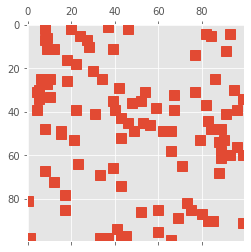

In [31]:
# import scipy module for sparse matrices
import scipy.sparse as spp

# sparse identity matrix
D = spp.eye(100)

# random sparse matrix
R = spp.random(100,100,density=0.01)

# plot a sparse matrix
import matplotlib.pyplot as plt
plt.spy(R)

And that's about all the math you need to know :-)

Now let's have *fun*.

<br />
<center>
<img src = ipynb.images/Calvin_and_hobbes._teacher.gif width = 400 />
</center>
<br />

<div style="text-align: right; color: gray">10</div>
## 10. Cooldown
Let's cool down with some linear algebra. 

Linear algebra in n-dimensional space is all about climbing a mountain in n dimensions, and each step can be represented by multiplying the position vector of the mountain climber by a step-matrix, to move to a new position represented by a new position vector. The position vector is just the arrow from the origin (start of the climb) to the current position of the climber. So as the mountain climber moves, that vector essentially rotates around its axis (the origin), and thus matrix multiplication is essentially a **solid rotation**. A matrix describes a specific kind of mountain move. For that mountain move, the matrice's eigenvectors describe all possible position vectors that are parallel before and after the move, while its eigenvalues describe by how much the climber has actually moved in that direction.

Wow, math is ***simple*** when explained right, right? Not ***your*** fault you didn't understand in school, ***your teacher's fault!***.

</br >
<center>
<img src="ipynb.images/warmup.png" width=200 />
</center>

</br >
<center>
<img src="ipynb.images/bouldering.jpg" width=600 />
</center>

In short, matrices represent **rigid transformations** in vector space, mapping one **state vector** to another state vector.

In [32]:
import numpy as np

theta = np.deg2rad(45)
R = np.array([[np.cos(theta), -np.sin(theta), 0],
              [np.sin(theta),  np.cos(theta), 0],
              [            0,              0, 1]])

print("R times the x-axis:", R @ [1, 0, 0])
print("R times the y-axis:", R @ [0, 1, 0])
print("R times a 45 degree vector:", R @ [1, 1, 0])

R times the x-axis: [0.70710678 0.70710678 0.        ]
R times the y-axis: [-0.70710678  0.70710678  0.        ]
R times a 45 degree vector: [0.         1.41421356 0.        ]


Since multiplying a vector by $R$ rotates it 45 degrees, multiplying the result
by $R$ again should result in the original vector being rotated 90 degrees.
Matrix multiplication is associative, which means that $R(Rv) = (RR)v$, so
$S = RR$ should rotate vectors by 90 degrees around the z-axis. Let's check.

In [33]:
S = R @ R
S @ [1, 0, 0]

array([0., 1., 0.])

In [34]:
print("R @ z-axis:", R @ [0, 0, 1])

R @ z-axis: [0. 0. 1.]


R rotates both the x and y axes, but not the z-axis.

What does that make the z-axis? If you thought that's an **eigenvector** of R, that is the *right answer*! What is its eigenvalue?

See, if you're a mountain climber, linear algebra and eigenvectors come naturally to you.

If you've never climbed a mountain and linear algebra remains a little bit of challenge, you could pick up an introductory linear algebra textbook, e.g. Gil Strang's [Linear Algebra](http://math.mit.edu/~gs/linearalgebra/) and its Applications. It's free. 

</br >
<center>
<img src="ipynb.images/wink.jpg" width=100 />
</center>


<div style="text-align: right; color: gray">11</div>
# Graphs

So, why did we do all this linear algebra? 

Because linear algebra is the foundational technique for climbing **mountains of data**, and that is what Google did when it conquered the **World-Wide Web**. [Sergei Brin](https://en.wikipedia.org/wiki/Sergey_Brin) and [Larry Page](https://en.wikipedia.org/wiki/Larry_Page) asked themselves, how do we climb that big mountain? The found out about linear algebra and applied it to the Web. And i'll show you how they did it.

By the way, this is how [Alex Honnold](https://en.wikipedia.org/wiki/Alex_Honnold) scaled El Capitan in Yosemite National Park in California in 2018. He reached the top of the route without the aid of ropes or safety gear. Read about it [here](https://www.nationalgeographic.com/adventure/features/adventurers-of-the-year/2018/alex-honnold-rock-climber/). Or watch the [movie](https://www.nationalgeographic.com/films/free-solo/) on Netflix.

</br >
<center>
<img src="ipynb.images/elcapitan2.jpg" width=600 />
</center>

</br >
<center>
<img src="ipynb.images/alexhonnold.jpg" width=600 />
</center>

Best way to track a mountain climber is to draw the path the climber takes to climb the mountain. So we essentialy draw a network of **nodes** (positions), and then join them with **edges**. So we draw a **graph**.

</br >
<center>
<img src="ipynb.images/elcapitan.jpg" width=600 />
</center>

</br >
Yes, this is a graph, too. But you might not want to climb this one. It would take a long time, would give you a headache, and you would probably get lost many times over.

</br >
<center>
<img src="ipynb.images/biggraph.jpg" width=400 />
</center>

But you know what? Your brain is also a **graph**. And Artificial Neural Networks (ANN) are also graphs. So, in order to do Machine Learning (ML), you need to know about graphs, which means you need to know how to **move** from one graph **node** to another. That is essentially a **mountain move**. So you need to learn **linear algebra**!

<div style="text-align: right; color: gray">12</div>
## Adjacency Matrix
Let's take a look at the **PageRank algorithm**, the algorithm that made Google famous. Its origins are actually in **article citation**. [Here](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0134794) are some examples, and [here](https://pdfs.semanticscholar.org/f33f/cdd5a0a5fd8b29e81748463836cad07d5e8c.pdf) too.

Let's play a game.

Suppose you have a graph linking $n$ x $n$ possible positions, and if you can move from one position $i$ to another position $j$, then you enter a 1 in the matrix cell $(i,j)$ and $(j, i)$. 0 otherwise. That matrix is called the [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) of the graph.

Say you want to analyze the relationships between libraries listed on the [Python Package Index](https://pypi.org/), or PyPI, which contains over **one hundred thousand packages**. Holding an adjacancy matrix for this graph, assuming 8-byte labels, would take 
up $8 \left(100 \times 10^3\right)^2 = 8 \times 10^{10}$ bytes, or 80GB,
of RAM. Do you have that much RAM on your computer? Bet you don't.

How about [github](https://github.com/)?

You might also want to analyze the Association for Computing
Machinery (ACM) citation graph, a [network](https://dl.acm.org/) of over *two million scholarly works
and references*. *That* adjacency matrix, for 8-byte labels, would take up 32 terabytes of RAM.

## Transition Matrix

That is the matrix that gives us possible moves, from one position to another. If we have a Markov chain of a game, then that matrix is **stochastic** and the results are viewed in a *probabilistic perspective*. 

## Sparse Matrix
We know that the dependency and reference graphs are *sparse*:
packages usually depend on just a few other packages, not on the whole of PyPI.
And papers and books usually only reference a few others, too. So the vast majority of the adjacency matrixes for the graphs referenced above are made up of **zeros**. So we can hold these adjacency matrices using the sparse data structures from `scipy.sparse`, and use the linear algebra functions in `scipy.sparse.linalg` to compute the values we need. 

More than anything else, [**sparse**](https://en.wikipedia.org/wiki/Sparse_matrix) matrix representations is *the* **tool** that allows you to handle computations like the ones mentionned above.

</br >
<center>
<img src="ipynb.images/tools.jpg" width=400 />
</center>

Note however that there *are* things we cannot do, even with sparse matrices. For example, the inverse of a sparse matrix is, in general, *not sparse*. Similarly, you can't get all the eigenvectors of a gigantic sparse matrix (even though you *can* express and view a gigantic sparse matrix), because eigenvectors would together make up a **dense** matrix.

But still, we can do a lot of funky things. And funky is what Google did.

<div style="text-align: right; color: gray">13</div>
# PageRank as a Markov Chain

Ok, so by now we know that linear algebra is all about **vectors** (ordered collections of numbers) and their transformations by multiplying them with **matrices** (collections of vectors, which rigidly rotate vectors in vector space, or represent state transition transformations if the matrix is stochastic). 

Vectors and matrices are to linear algebra what counting is to probabilities and statistics, and the **eigendecomposition theorem** is linear algebra's analog to Bayes' thorem in probabilities and statistics.

We also know how to think of vectors and vector rotations: **climbing a mountain** in n dimensions.

We also know about **Markov chains**: memoryless state machines with interesting steady-state properties, like the game of chess or Go. That's when we can't move wherever we want on the mountain; only from ***one*** specific position to ***another*** specific position. And if there's randomness involved, which you should be comfortable with by now since we learned all about probabilities and statistics (you should be comfortable with fractional values in a matrix instead of 0s and 1s -stochastic matrixes). Which means, for example, half of the times you move **there**, the other half, **over there instead**. 

There is a theorem called the **fixed point theorem** for continuous transformations (stems from the
[Perron-Frobenius theorem](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem)),
which states that a stochastic matrix has **1** as its ***largest*** eigenvalue, and that its associated eigenvector, called **dominant**, represents the `long-term steady-state` of the associated state machine: Where you'll end up after millions of state transitions. The dominant eigenvector unlocks the ***long-term*** (steady-state) behavior of Markov Chains. 

The dominant eigenvector also yields the results of Google queries!

</br >
<center>
<img src="ipynb.images/whaat.jpg" width=200 />
</center>

- A Google search is nothing more than a search for the dominant eigenvector of your search pattern query on the graph made up by the World Wide Web, which links documents to documents. If you can write down the adjacency matrix of the WWW, a 1 in cell $(i, j)$ where $i$ represents http://a.b.c.d and $j$ represents http://e.f.g.h means that http://a.b.c.d has a link to http://e.f.g.h. Does this work the other way around, too? If not, we say that the graph is **directional**. 

Today we'll explore this concept a bit more, and by doing so practice linear algebra and learn some python tools that simplify working with Big Data.

## Some Graph Concepts


</br >
<center>
<img src="images/pagerank.png" width=400 />
</center>

Let's picture a graph, $G$,
as an *adjacency matrix*, in which we number the nodes of the graph from $0$
to $n-1$, and place a 1 in row $i$, column $j$ of the matrix whenever there is
an edge from node $i$ to node $j$. In other words, if we call the adjacency
matrix $A$, then $A_{i, j} = 1$ if and only if the edge $(i, j)$ is in $G$. We
can then use linear algebra techniques to study this matrix.

The *degree* of a node is defined as the number of edges touching it.  For
example, if a node is connected to five other nodes in a graph, its degree
is 5. In matrix terms, the degree corresponds to the *sum*
of the values in a row or column of the adjacency matrix.

In case of *directed* graphs (graph edges have a preferred direction, like hyperlinks in the WWW), number of edges going into a node (as hyperlinks, for example) is known as *in-degree* of the corresponding node, while number of edges coming out of a node is known as *outdegree* of the corresponding node.

#### Exercise: Write the adjacency matrix of the following graph, and find the in and out degrees of each node:

Write the adjacency matrix and the in and out degrees as numpy arrays.

</br >
<center>
<img src="images/graphexample.png" width=400 />
</center>

It's easier to understand Google's *PageRank* if we start with simple lab. 

In [28]:
import numpy as np
T = np.array([[0, 1, 1, 0, 0, 0, 0],[0,0,0,0,0,0,0],[1,0,0,0,0,1,1],[0,1,0,1,0,0,0],[0,0,1,1,0,0,0],[0,0,0,0,1,0,1],[0,0,0,0,0,1,0]])
T

array([[0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

<div style="text-align: right; color: gray">14</div>

# Food Webs: Who eats whom

</br>
<center>
<img src="images/foodwebs.jpg" width=400 />
    yummy yummy..
</center>

To rank Web pages by importance, you count
how many other Web pages link to it. That is the basic logic of the **PageRank** algorithm, which inherits from scientific article citation research.  

The key insight that drove Google's early success was that important Web pages
are not linked to by just many Web pages, but by *important*
Web pages. And how do we know that those other pages are important? Because
they themselves are linked to by important pages. And so on. This is a **recursive definition**.

To build a stochastoc *transition matrix* that contains the probabilities of surfing from one Web page to another, for all pages in the Word Wide Web, would be a daunting task. In fact, even just the **adjacency matrix** (what you did above) would be a daunting task because of the huge size of the WWW graph. And yet, that is exactly what Google did.

Transition matrix probabilities depend on the hyperlinks contained in each Web page. Thus the transition matrix is a function of the *adjacency matrix* of the WWW graph.

### gedankenexperiment

Imagine that the WWW is like the network of roads built by the ancient Romans (in the early days of the WWW, it was exactly like Roman chariot highways, as all WWW nodes eventually linked to central nodes at the University of Illinois in Urbana-Champaign - your instructor remembers these days). If you're a charioteer lost on roman highways, chances are pretty good you'll eventually end up in Rome, right?

</br >
<center>
<img src="images/chariot.png" width=300 />
</center>

Well, if you're the silver surfer from the Fantastic Four [movie](https://en.wikipedia.org/wiki/Fantastic_Four:_Rise_of_the_Silver_Surfer), and Google has hired you to surf the Web at the speed of light, what sites will you tend to visit *a lot more than others*?

</br >
<center>
<img src="images/silversurfer.png" width=200 />
</center>

The ones that most hyperlinks point to the most, right? And if you only surf the Web pages relevant to a particular Google word query, then listing these and returning them would be the result of the Google search engine, right?

### drum-roll
The search for $\boldsymbol{r}$, Google's search engine results, is nothing more than the search for the dominant eigenvector of the WWW's transition matrix, listed in descending order (the node with the highest component of the eigenvector is the top search result). 
- That's not actually *entirely* correct. The situation is a bit more complicated because a user can also surf to any URL by using the URL bar, similarly to how we draw cards in Monopoly to jump from one board square to another very far away. We have to wait until we write down the silver surfer formula to see that the exact equation looks like. But for now we can assume there is no URL bar :-)

Google initially carried out this computation for the WWW graph on another graph of hundreds of computers, in a distributed fashion, using a mapreduce-style algorithm.

We don't have as much computing power as google in our laptops and our notebooks, but we can probably analyze smaller networks in the same way that Google analyzed the WWW. We'll use an example by Stefano Allesina and Mercedes Pascual,
which they [published](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1000494i)
in PLoS Computational Biology. They applied the method to ecological *food webs*, networks that link species to those species they eat.

Naively, if you wanted to see how critical a species was for an ecosystem, you
would look at how many species ***eat it***. If it's many, and that species
disappeared, then all its "dependent" species might disappear with it! In
network parlance, you could say that its **in-degree** determines its **ecological
importance**.

Here is a food Web from the St Marks National Wildlife Refuge in
Florida, in Graph Markup Language format. The web was [described](http://www.sciencedirect.com/science/article/pii/S0304380099000228)
in 1999 by Robert R. Christian and Joseph J. Luczovich. In the dataset, a
node $i$ has an edge to node $j$ if species $i$ eats species $j$.

Let's load the data, leveraging `networkx`, a Python [package](https://networkx.github.io/) for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks (pretty cool). Click [here](https://networkx.github.io/documentation/networkx-0.37/) for its API.

```(python)
pip install networkx
```

Let's also load the data for the experiment, in the Graph Modeling Language (GML) format, a hierarchical ASCII-based file [format](https://en.wikipedia.org/wiki/Graph_Modelling_Language) for describing graphs.

In [38]:
import networkx as nx
stmarks = nx.read_gml('data/stmarks.gml')

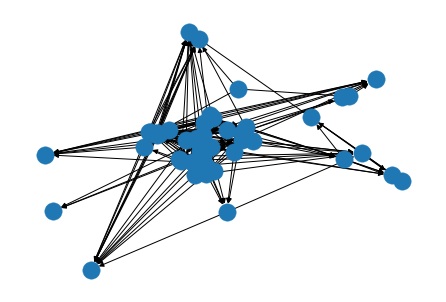

In [39]:
import matplotlib as pl
nx.draw(stmarks,pos=nx.spring_layout(stmarks))

{'fish-eating birds': Text(-0.06912356927190691, 0.12242842450387555, 'fish-eating birds'),
 'atlantic silverside and bay anchovies': Text(0.06734735944631427, -0.07843519332038028, 'atlantic silverside and bay anchovies'),
 'macro-epiphytes': Text(0.9607188910078183, 0.37349765842486077, 'macro-epiphytes'),
 'spot': Text(-0.07892130625655511, 0.10532260362627521, 'spot'),
 'brittle stars': Text(-0.3254663091664513, -0.029540801876618058, 'brittle stars'),
 'catfish and stingrays': Text(0.047770384059569494, -0.24260837574480018, 'catfish and stingrays'),
 'predatory polychaetes': Text(0.037565696354652345, -0.06254015515278402, 'predatory polychaetes'),
 'pinfish': Text(-0.1431458659745016, -0.02855060955436004, 'pinfish'),
 'killifish': Text(0.13376425491456878, -0.12902413519971292, 'killifish'),
 'herbivorous ducks': Text(0.16731374139176217, 0.04415511570928524, 'herbivorous ducks'),
 'other gastropods': Text(-0.1673594639472964, 0.774062823841829, 'other gastropods'),
 'predatory

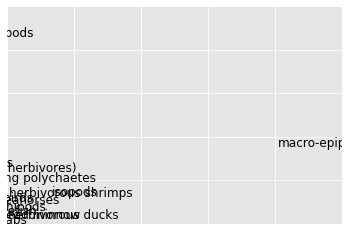

In [40]:
nx.draw_networkx_labels(stmarks,pos=nx.spring_layout(stmarks))

Let's get the adjacency matrix for that graph, in sparse matrix representation. We will use SciPy's `sparse` package for that.  Because a matrix only holds numerical information, we need to maintain a separate list of names corresponding to the graph nodes.

In [41]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
species = np.array(list(stmarks.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(stmarks, dtype=np.float64)

In [42]:
species

array(['fish-eating birds', 'atlantic silverside and bay anchovies',
       'macro-epiphytes', 'spot', 'brittle stars',
       'catfish and stingrays', 'predatory polychaetes', 'pinfish',
       'killifish', 'herbivorous ducks', 'other gastropods',
       'predatory gastropods', 'deposit-feeding polychaetes', 'raptors',
       'Halodule wrightii', 'gulls', 'epiphyte-grazing gastropods',
       'detritus', 'deposit-feeding peracaridan crustaceans',
       'blue crabs', 'pipefish and seahorses',
       'epiphyte-grazing amphipods', 'bacterioplankton',
       'fish and crustacean-eating birds',
       'suspension-feeding polychaetes', 'sheepshead minnow',
       'phytoplankton', 'zooplankton', 'suspension-feeding molluscs',
       'red drum', 'predatory shrimps', 'benthic algae',
       'benthic bacteria', 'tonguefish', 'hermit crabs',
       'southern hake and sea robins', 'benthos-eating birds',
       'herbivorous shrimps', 'omnivorous crabs', 'meiofauna',
       'microfauna', 'micropr

In [43]:
import pandas as pd
pd.DataFrame(species[:20]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,fish-eating birds,atlantic silverside and bay anchovies,macro-epiphytes,spot,brittle stars,catfish and stingrays,predatory polychaetes,pinfish,killifish,herbivorous ducks,other gastropods,predatory gastropods,deposit-feeding polychaetes,raptors,Halodule wrightii,gulls,epiphyte-grazing gastropods,detritus,deposit-feeding peracaridan crustaceans,blue crabs


From the adjacency matrix, we will derive a transition probability matrix, where:

- Every 1-edge is replaced by a probability of 1 over the number of outgoing edges from that species. In the food web, it might make more sense to call this a *lunch probability matrix*

</br >
<center>
<img src="images/shark.png" width=300 />
</center>

For example, if shrimp is eaten by whales, sharks, tilapia, and humans, then the shrimp-row of the transition matrix for the ***eaten by*** transformation contains $1/4$ for the columns whale, shark, tilapia, human, zeros everywhere else.

The total number of species in our matrix is going to be used a lot, so let's call it $n$:

In [44]:
n = len(species)
Adj

<48x48 sparse matrix of type '<class 'numpy.float64'>'
	with 221 stored elements in Compressed Sparse Row format>

To reveal `Adj`, do:

In [45]:
Adj.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

To make it look pretty, pandas to the rescue!

In [46]:
pd.DataFrame(Adj.todense())

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Next, we need the degrees, and, in particular, the diagonal matrix containing the inverse of the out-degrees of each node on the diagonal. Note that numpy's [ravel](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ravel.html) usually returns a view into the existing array (sometimes it returns a copy). [flatten](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.flatten.html) returns a new array.

Also note, there are several sparse matrix classes in `scipy`. If you want to process big data, these representations are your friends. 

* bsr_matrix(arg1[, shape, dtype, copy, blocksize]) Block Sparse Row matrix
* coo_matrix(arg1[, shape, dtype, copy]) A sparse matrix in COOrdinate format.
* csc_matrix(arg1[, shape, dtype, copy]) Compressed Sparse Column matrix
* csr_matrix(arg1[, shape, dtype, copy]) Compressed Sparse Row matrix
* dia_matrix(arg1[, shape, dtype, copy]) Sparse matrix with DIAgonal storage
* dok_matrix(arg1[, shape, dtype, copy]) Dictionary Of Keys based sparse matrix.
* lil_matrix(arg1[, shape, dtype, copy]) Row-based linked list sparse matrix

Since we divide by a lot of numbers, some of which can be zero, we use a numpy capability, which ***can be very dangerous***, but also useful sometimes: `np.seterr(divide='ignore')`.

In just two lines of python, we obtain degrees, and build a diagonal matrix with each $(i,i)$ node containing the inverse of the out-degree for that node:

In [47]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

Since adjacency matrices are often sparse, and filled with only ones, plotting them cam be quite informative. Let's write a matrix plotting function.

In [48]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

Let's plot the diagonal matrix made of the inverse of the out-degrees of each node, and the food Web matrix, too.

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

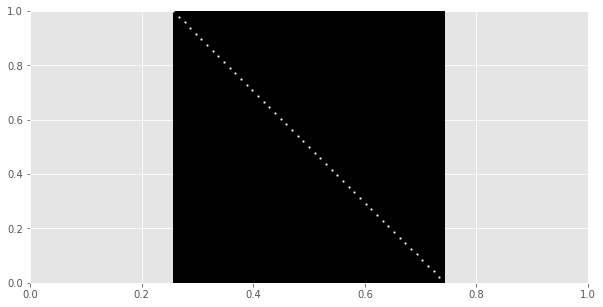

In [49]:
m = sparse.diags(1 / degrees).tocoo()
ax = plot_coo_matrix(m)
ax.figure.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

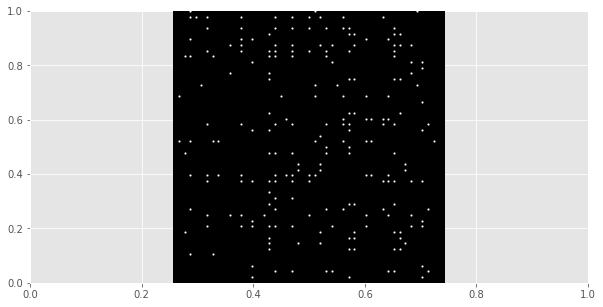

In [50]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

And for ascii style, with out-degrees on the right margin:

In [51]:
dense = Adj.todense()
#for x in np.nditer(dense, order='K'):
#    print (int(x)),

#for row in dense[0]:
#    numbers =[ np.vectorize(np.int)(x) for x in row ]
#''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '')

# ok this was way too tough!
for i in range(48):
    for row in dense[i]:
        numbers =[ np.vectorize(np.int)(x) for x in row ]
        degrees = np.sum(numbers)
        print(''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '') + ' ' + str(degrees))

[[000100000000000000000000010000000000000000010000]] 3
[[000110100000100000100100101000100000010000000000]] 10
[[000000000000000000000000000000000000000000000000]] 0
[[000000100000100000100100100100110000000100000000]] 9
[[000000000000000001000000000000011000000110000000]] 5
[[000100000000101000000000000000000010001000000000]] 5
[[000000000010100000100100001010001000000110100000]] 10
[[000000100000100001100100100100010000000100000000]] 9
[[001100010000000001100100000100000000000100000000]] 8
[[000000000000001000000000000010000000000000101000]] 4
[[000000000000000000000000000000000000000000001000]] 1
[[000000000010000001000000000000000000000000100000]] 3
[[000000000000000001000000000000011000000110000000]] 5
[[000001000000000000000000010001000000000000010000]] 4
[[000000000000000000000000000000000000000000000000]] 0
[[010000000000000000010000010000100010001000000000]] 6
[[000000000000000000000000000000000000000000001000]] 1
[[000000000000000000000000000000000000000000000000]] 0
[[000000

Wow! This looks like ascii-art, doesn't it?

## Homework

Assume the ascii-art of your beautiful face is a graph adjacency matrix.

Assume the various values you had for the ascii-art pixels of your beautiful face represent the **weight** of the connection between two nodes. 

Use networkX to draw the graph of your face. Get rid of any background. I just want your face.


## Back to our class..

And now compute the transition matrix in the way below, because mutliplying a matrix by a diagonal matrix of factors will mutliply each entry in the matrix by its associated factor, which is the probability of geating eaten.

In [52]:
Trans = (Deginv @ Adj).T
Trans

<48x48 sparse matrix of type '<class 'numpy.float64'>'
	with 221 stored elements in Compressed Sparse Column format>

Let's verify by examining the first row:

In [53]:
dTrans = Trans.T.todense()
dTrans[0]

matrix([[0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.33333333, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.33333333, 0.        ,
         0.        , 0.        , 0.        ]])

fish-eating birds have three predators.

### Search for the Dominant Eigenvector

If the Google search engine unleashes the silver surfer on our Food Web network, and since he surfs at the speed of light, he totally finds the most linked pages, the way Romans on chariots end up in Rome. 

We cannot surf at the speed of light, unfortunately, but Prof. Dino told us about the **dominant eigenvector**, so we know all we need to do is find the eigenvector associated with the eigenvalue = 1, for the graph transition matrix (don't confuse *transtion matrix* with *adjacency matrix*).

And the dominant eigenvector's components will give us the PageRank score of each node! All we need to do is to rearrange the vector's components with the highest component first, 2nd highest 2nd, etc, and then return that sorted eigenvector to the user. ***That is what Google does with your search queries***! 

If we call the transition matrix $M$ and the vector of PageRank values (dominant eigenvector) $r$, we have:

$$
\boldsymbol{r} = M\boldsymbol{r}
$$

In other words, Google's search engine returns the **fixed point** of the network graph restricted to your particular query.

But.. for the silver surfer to be able to search every page, *every* page must be reachable
from every other page. Our food web is problematic (we say *degenerate* in linear algbra): The bottom of the food chain,
what the authors call *detritus* (basically *sea sludge*), doesn't actually *eat*
anything, so you *can't reach other species from it*. When the silver surfer arrives at that node, ***he is stuck***!

</br >
<center>
<img src="ipynb.images/mufasa.gif" width=400 />
</center>

> *Young Simba:* But, Dad, don't we eat the antelope?
>
> *Mufasa:* Yes, Simba, but let me explain. When we die, our bodies become the
> grass, and the antelope eat the grass. And so we are all connected in the
> great Circle of Life.
>
> — *The Lion King*

Hmm, so says Simba, but not always, right?

And that is why our browsers **have a browser bar**, where the user enters a URL to surf ***directly*** to a page (maybe we get that URL from word-of-mouth). So that way, we *can* get to any Web page. In fact, Google did some research that uncovered that about 85% of the time, we just follow links, and 15% of the time, we enter URLs. 

So we modify the PageRank algorithm with a so-called **damping factor**, usually taken to be 0.85. 

This means that 85% of the time, the silver surfer follows a link at random but with well-defined probabilities (in the same way a random sampling from a Normal distribution will give us a random-looking process but with well-defined probabilities leading to a normal distribution for its histogram), but for the other 15%, it randomly jumps to
an *arbitrary* page. It's as if ***every page had a low probability link to every
other page even if the two pages don't link to each other through hyperlinks***. 

In our case, it's as if shrimp, on rare occasions, eat sharks :-)

I don't want to scare you, but if we lived in a **quantum world**, ants would sometimes ***eat you***! That's how quantum mechanics work.

If we call the damping factor $d$, and $\boldsymbol{1}$ is the Identity matrix, then the modified PageRank equation is:

$$
\boldsymbol{r} = dM\boldsymbol{r} + \frac{1-d}{n} \boldsymbol{1}
$$

or:

$$
(\boldsymbol{I} - dM)\boldsymbol{r} = \frac{1-d}{n} \boldsymbol{1}
$$

I call this equation the **silver surfer formula**, and it shows you the contribution of the URL bar to search results. 

In fact, that is the reason why Google gives out Chrome ***for free***. It needs to **spy** on your URL bar so that it can keep refining the dominant eigenvector for the World Wide Web (have you noticed how aggressive Google has been lately every time we give it a query with another browser?)!

</br >
<center>
<img src="ipynb.images/chrome.png" width=400 />
</center>

We can solve the silver surfer formula using `scipy.sparse.linalg`'s direct
solver, `spsolve`, because our graph is pretty small, much smaller than the WWW. 

Depending on the structure and size of a linear algebra
problem, though, it might be more efficient to use an iterative solver. See
the `scipy.sparse.linalg` [documentation](http://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#solving-linear-problems)
for more information on iterative solvers.

In [54]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

And here's the PageRank for each species:

In [55]:
in_degrees = np.ravel(Adj.sum(axis=0))

In [56]:
import pandas as pd
for i, (s, d, p) in enumerate(zip(species, in_degrees, pagerank)):
    print(i, s, '(' + str(d) + ')', p)

0 fish-eating birds (0.0) 0.0031250000000000006
1 atlantic silverside and bay anchovies (2.0) 0.003862847222222223
2 macro-epiphytes (3.0) 0.006600489539708688
3 spot (8.0) 0.00851913395634404
4 brittle stars (1.0) 0.0034533420138888895
5 catfish and stingrays (1.0) 0.0037890625000000008
6 predatory polychaetes (8.0) 0.00671863139327715
7 pinfish (3.0) 0.005798698933919272
8 killifish (2.0) 0.003688530815972223
9 herbivorous ducks (0.0) 0.0031250000000000006
10 other gastropods (3.0) 0.004913531585095225
11 predatory gastropods (0.0) 0.0031250000000000006
12 deposit-feeding polychaetes (10.0) 0.007933855686705708
13 raptors (0.0) 0.0031250000000000006
14 Halodule wrightii (8.0) 0.012545984081857815
15 gulls (0.0) 0.0031250000000000006
16 epiphyte-grazing gastropods (1.0) 0.003457031250000001
17 detritus (15.0) 0.03364348083239246
18 deposit-feeding peracaridan crustaceans (13.0) 0.010376963089850342
19 blue crabs (1.0) 0.003567708333333334
20 pipefish and seahorses (2.0) 0.003898817274

How does a species' foodrank compare to the number of other species eating it? Let's write a function to scatter-plot PageRank versus in-degree for named nodes.

In [57]:
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)

    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degree (number of predators)')

We pre-label some interesting nodes in the plot:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


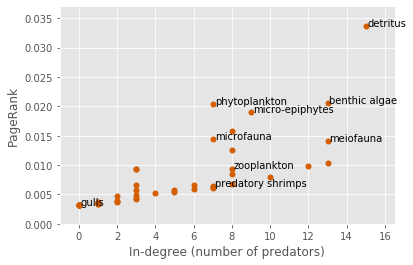

In [58]:
interesting = ['detritus', 'phytoplankton', 'benthic algae', 'micro-epiphytes',
               'microfauna', 'zooplankton', 'predatory shrimps', 'meiofauna',
               'gulls']

pagerank_plot(in_degrees, pagerank, species, annotations=interesting)

Sea sludge ("detritus") is the most important element both by number of
species feeding on it (15) and by PageRank (>0.003). But the second most
important element is *not* benthic algae, which feeds 13 other species, but
rather phytoplankton, which feeds just 7! That's because other *important*
species feed on it. 

Web pages' PageRank works the same way!

So, on the bottom left, we've got sea gulls, who, we can now
confirm, eat everything in the ecosystem. They are the **vacuum machines** of nature! And those vicious *predatory shrimps* support the same number of species as phytoplankton, but they are less essential species, so they end up with a lower foodrank.

Allesina and Pascual go on to model the ecological impact of species extinction, and indeed find that PageRank
predicts ecological importance really well. Interesting article!

PageRank can actually be computed several
different ways. One way is what we did above, with math. Another way is called the
*power method*, and is an **approximation**. This is actually what Google first did, and what made `mapreduce()` famous because PageRank was implemented mapreduce-style. That's because solving *exactly* a system of linear equations with dimension equal to the WWW would be... unfeasible. Would take much too long!

### The Power Method
We know from the [Perron-Frobenius theorem](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem),
that a stochastic matrix has 1 as an eigenvalue, and that this is its *largest* eigenvalue (the corresponding
eigenvector is the dominant or PageRank vector). What this means is that, whenever we
multiply *any* vector $v$ by the transition matrix $M$, the component of $v$ pointing towards the dominant
eigenvector of $M$ stays the same, while *all other components shrink* by a
multiplicative factor. 

The corollary is that ***if we multiply some random
starting vector by $M$ repeatedly, we should eventually get the PageRank
vector since all other components will eventually shrink to zero***!

SciPy makes this very efficient with its sparse matrix module.

`numpy.full(shape, fill_value)` returns a new array with the same `shape` and type as a given array filled with a `fill_value`.

`numpy.allclose()` is used to find if two arrays are element-wise equal within a tolerance.

In [59]:
def power(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    r0 = np.full(n, 1/n)
    r = r0
    for _iter_num in range(max_iter):
        rnext = damping * M @ r + (1 - damping) / n
        if np.allclose(rnext, r):
            break
        r = rnext
    return r

Let's go back to matrix `Trans`.

Recall that a transition matrix needs to be *column-stochastic*, in which all column entries sum to 1:

In [60]:
rows = 0
for i in range(48):
    if (np.sum((Trans.todense().T)[i]) != 1.):
        rows += 1
print("non stochastic rows: " + str(rows))

non stochastic rows: 8


oopsie..

</br >
<center>
<img src="ipynb.images/oops.jpg" width=100 />
</center>

Let's take a peek..

In [61]:
for i in range(48):
    print(np.sum((Trans.todense().T)[i]))

1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.9999999999999999
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.9999999999999999
1.0


In order to have a **stochastic** matrix, all columns of the transition matrix must sum to 1 (all probabilities need to sum up to 1). This is ***not satisfied*** when a species ***isn't eaten by any others***: that column will consist of all zeroes! 

Above, we have 8 rows that sum to 0. We call these *dangling nodes*. However, replacing columns in that row by arbitrary 1/n **1** so that the row sum is 1 could be an expensive operation if our matrix has large dimensions.

An efficiency is to realise that every row will contribute the same amount to the multiplication of the transition matrix by the current probability vector. That is to say, adding these columns will add a single value to the result of the multiplication of `Trans` by a vector $r$. What value?  1/n times the elements of  $r$ that correspond to a dangling node. This can be expressed as a dot-product of a vector containing 1/n for positions corresponding to dangling nodes, and zero elswhere, with the vector  $r$  for the current iteration. So we can write:

In [62]:
def power2(M, damping=0.85, max_iter=10**5):
    n = M.shape[0]
    dangling = (1/n) * np.ravel(M.sum(axis=0) == 0)
    r0 = np.full(n, 1/n)
    r = r0
    for _ in range(max_iter):
        rnext = (damping * (M @ r + dangling @ r) +
                 (1 - damping) / n)
        if np.allclose(rnext, r):
            return rnext
        else:
            r = rnext
    return r

You can try this out manually for a few iterations. Notice that if you start with a
stochastic vector (a vector whose elements all sum to 1), the next vector will
still be a stochastic vector. Thus, the output PageRank from this function will
be a true probability vector, and the values will represent the probability
that we end up at a particular species when following links in the food chain.

Even though `power2` is more correct, it will give the same ranking as `power`.

To verify that these three methods all give the same ranking for the
nodes, `numpy.corrcoef` might be a useful function for this.

`np.corrcoef` gives the **Pearson correlation** coefficient between
all pairs of a list of vectors. This coefficient will be equal to 1 if and only
if two vectors are scalar multiples of each other. Therefore, a correlation
coefficient of 1 is sufficient to show that the above methods produce the same
ranking.

In [63]:
pagerank_power = power(Trans)
pagerank_power2 = power2(Trans)
np.corrcoef([pagerank, pagerank_power, pagerank_power2])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

Let's double-check:

In [64]:
for i, (s, pr, prp, prp2) in enumerate(zip(species, pagerank, pagerank_power, pagerank_power2)):
    print(i, s, pr, prp, prp2, prp/prp2)

0 fish-eating birds 0.0031250000000000006 0.0031250000000000006 0.008660797633909728 0.36082126982908014
1 atlantic silverside and bay anchovies 0.003862847222222223 0.0038628472222222232 0.01070570512813968 0.3608213729022692
2 macro-epiphytes 0.006600489539708688 0.006600491479577001 0.018292979872656746 0.3608210103288323
3 spot 0.00851913395634404 0.00851913395634404 0.023610385384364208 0.3608214697751511
4 brittle stars 0.0034533420138888895 0.0034533420138888895 0.00957078193783686 0.36082130345447994
5 catfish and stingrays 0.0037890625000000008 0.0037890625000000008 0.010501214378716687 0.36082136440138535
6 predatory polychaetes 0.00671863139327715 0.006718631393277151 0.018620396854801064 0.36082106335691905
7 pinfish 0.005798698933919272 0.0057986989339192715 0.016070829121059813 0.3608213919915582
8 killifish 0.003688530815972223 0.0036885308159722227 0.010222596084373958 0.3608213398561675
9 herbivorous ducks 0.0031250000000000006 0.0031250000000000006 0.00866079763390972

Highest PageRank? *Detritus* or sea-sludge, at 0.03. 2nd highest PageRank? *Phytoplankton*, or *Benthic algae* at 0.02.

</br >
<center>
<img src="ipynb.images/algae.jpg" width=400 />
</center>

<div style="text-align: right; color: gray">15</div>

# Conclusion


This notebook introduced you to **linear algebra** with `NumPy` and `SciPy`, indeed simplified linear algebra by looking at it from the perspective of climbing mountains, introduced eigenvectors and eigenvalues as the most important decomposition of matrices, and showed you how to explore graphs and how to compute important attributes of graphs such as the **PageRank** of each node. 

Doesn't this make you want to explore the facebook graph, or something similar?

This notebook should also give you an idea of the power of `SciPy` and its elegant algorithms. It should make you want to explore `SciPy`, especially before any assignment, to figure out what you can leverage from it. Before you put your trust in software snake venom salesmen that tout the benefits of this package or that package, try out SciPy first!

</br >
<center>
<img src="ipynb.images/wink.jpg" width=100 />
</center>


### References
* [PageRank](https://en.wikipedia.org/wiki/PageRank)
* [MapReduce](https://en.wikipedia.org/wiki/MapReduce)
* [T-SQL MapReduce](https://www.codeproject.com/Articles/627421/T-SQL-MapReduce)

# Homework

Analyze another graph using graph theory as we did with food Webs. Find the dominant eigenvector from any perspective you pick (a graph could have mutliple concepts embedded). Write a search engine to find the most important nodes from any perspective of your choice. For example, you could write a search engine on that graph, or just fix the search engine to one  concept.

Don't try to get too complicated. Just copy the methods in this notebook and find another graph to apply them to. Google on the Web, then put it in GML format. Or find one originally in GML format ;-)


# Homework bonus points

Write a python program that takes in any picture and computes an ASCII representation, like the 0s and 1s above with our adjacency matrix (search for `ascii style` in this notebook). Take an ASCII picture of yourself. Put it on top of your HW notebook.


</br >
<center>
<img src="ipynb.images/einstein.jpeg" width=500 />
</center>

</br >
<center>
<img src="ipynb.images/pretty.gif" width=400 />
</center>